<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.3 MB 8.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=34ec0c380de4e9933df2e60ee798dff5b92c6aa1c378ed88735b9f2ef5a4f38f
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=f9bff71f837b19315cbb0063d0cb497a45df5a3c778b535c4424f54ea2905667
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [6]:
companies = ['RBLX',]
#startDate = "2018-01-02"
startDate = "2017-01-01"
endDate = "2021-11-08"

In [9]:
finalData=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.tail(10)

,Date,RBLX
2021-10-25,2021-10-25,83.209999
2021-10-26,2021-10-26,80.889999
2021-10-27,2021-10-27,80.680000
2021-10-28,2021-10-28,82.750000
2021-10-29,2021-10-29,84.019997
2021-11-01,2021-11-01,81.139999
2021-11-02,2021-11-02,79.589996
2021-11-03,2021-11-03,78.360001
2021-11-04,2021-11-04,82.529999
2021-11-05,2021-11-05,77.989998


In [10]:
#Check if any Columns have empty values(NAN)
finalData.sort_values(by=['Date'])
finalData.columns[finalData.isna().any()].tolist()
print(finalData)

                 Date       RBLX
2021-03-10 2021-03-10  69.500000
2021-03-11 2021-03-11  73.900002
2021-03-12 2021-03-12  69.699997
2021-03-15 2021-03-15  72.150002
2021-03-16 2021-03-16  77.000000
...               ...        ...
2021-11-01 2021-11-01  81.139999
2021-11-02 2021-11-02  79.589996
2021-11-03 2021-11-03  78.360001
2021-11-04 2021-11-04  82.529999
2021-11-05 2021-11-05  77.989998

[169 rows x 2 columns]


AxesSubplot(0.125,0.2;0.775x0.68)
(169, 1)


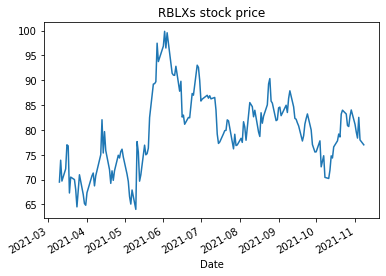

In [11]:
goodCompanies = ['RBLX']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)

In [12]:
finalVolume=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Close',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Volume': company})
  tmp = tsla_df[str(company)]

  finalVolume = finalVolume.append(tmp, ignore_index=True)
finalVolume = finalVolume.T # or df2.transpose()
for i in range(len(companies)):
  finalVolume = finalVolume.rename(columns={i: companies[i]})

In [13]:

finalVolume['Date'] = finalVolume.index
col_name="Date"
first_col = finalVolume.pop(col_name)
finalVolume.insert(0, col_name, first_col)

In [14]:
finalVolume


,Date,RBLX
2021-03-10,2021-03-10,97069300.0
2021-03-11,2021-03-11,59629300.0
2021-03-12,2021-03-12,19714700.0
2021-03-15,2021-03-15,19549800.0
2021-03-16,2021-03-16,30274400.0
...,...,...
2021-11-01,2021-11-01,6274200.0
2021-11-02,2021-11-02,4551300.0
2021-11-03,2021-11-03,4730900.0
2021-11-04,2021-11-04,6702200.0


In [17]:
finalVolume=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start=startDate, 
                      end=endDate, 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Close',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Volume': company})
  tmp = tsla_df[str(company)]

  finalVolume = finalVolume.append(tmp, ignore_index=True)
finalVolume = finalVolume.T # or df2.transpose()
for i in range(len(companies)):
  finalVolume = finalVolume.rename(columns={i: companies[i]})




finalVolume['Date'] = finalVolume.index
col_name="Date"
first_col = finalVolume.pop(col_name)
finalVolume.insert(0, col_name, first_col)
finalVolume


,Date,RBLX
2021-03-10,2021-03-10,97069300.0
2021-03-11,2021-03-11,59629300.0
2021-03-12,2021-03-12,19714700.0
2021-03-15,2021-03-15,19549800.0
2021-03-16,2021-03-16,30274400.0
...,...,...
2021-11-01,2021-11-01,6274200.0
2021-11-02,2021-11-02,4551300.0
2021-11-03,2021-11-03,4730900.0
2021-11-04,2021-11-04,6702200.0


AxesSubplot(0.125,0.2;0.775x0.68)
(169, 1)


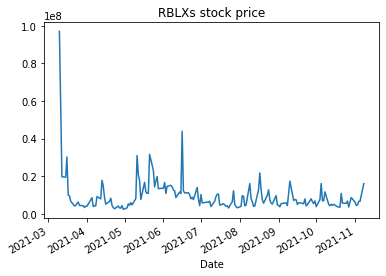

In [22]:
goodCompanies = ['RBLX']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="1Y")
  print(tsla_df['Volume'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)

AxesSubplot(0.125,0.2;0.775x0.68)
(169, 1)


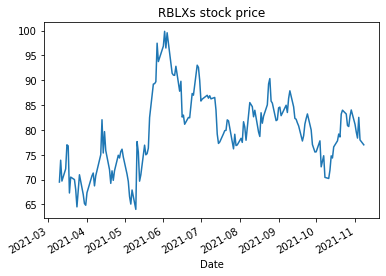

In [23]:
goodCompanies = ['RBLX']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="5Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)